In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("C:\\Users\\shrad\\Downloads\\TEMP_ANNUAL_SEASONAL_MEAN.csv")
print(df.head())

     YEAR ANNUAL JAN-FEB MAR-MAY JUN-SEP OCT-DEC
0  1901.0  25.42   20.11   27.64   28.16    23.1
1  1902.0  25.42   20.88   27.96   27.98   22.51
2  1903.0  25.01   19.99   27.02      28   22.33
3  1904.0  24.93   19.76   27.23   27.57   22.56
4  1905.0  24.84   18.36   26.38    28.2   23.13


In [3]:
df = df[['YEAR', 'ANNUAL']].dropna()
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('YEAR', inplace=True)


In [4]:
ts = df['ANNUAL'].astype(float)

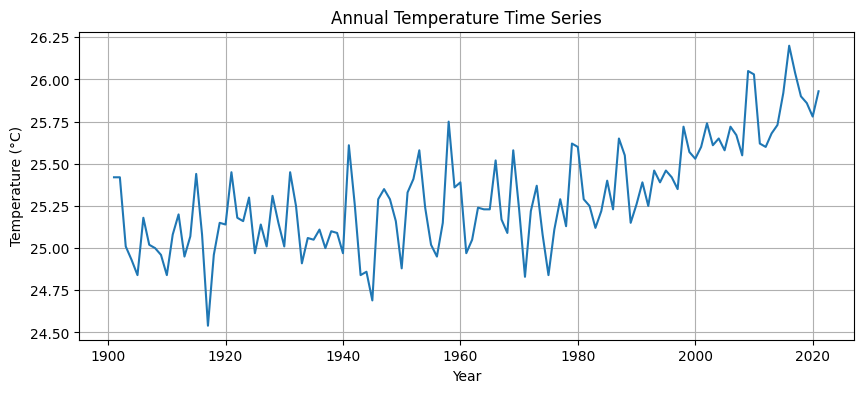

In [5]:
# Plot Original Time Series
plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title('Annual Temperature Time Series')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

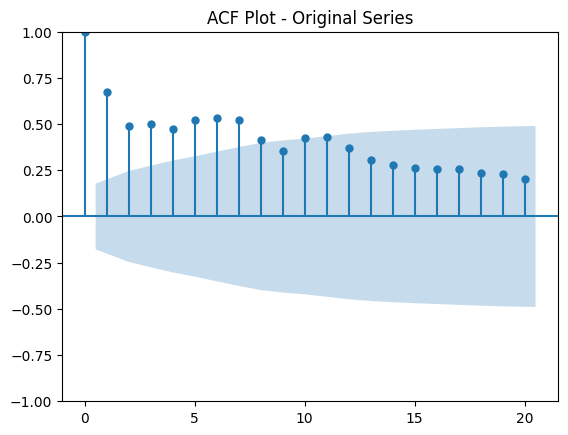

In [6]:
# Plot ACF of Original Series
plot_acf(ts, lags=20)
plt.title('ACF Plot - Original Series')
plt.show()

In [7]:

# Check Stationarity with ADF Test
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: 1.6092162053605803
p-value: 0.9978849635507783
The series is not stationary.


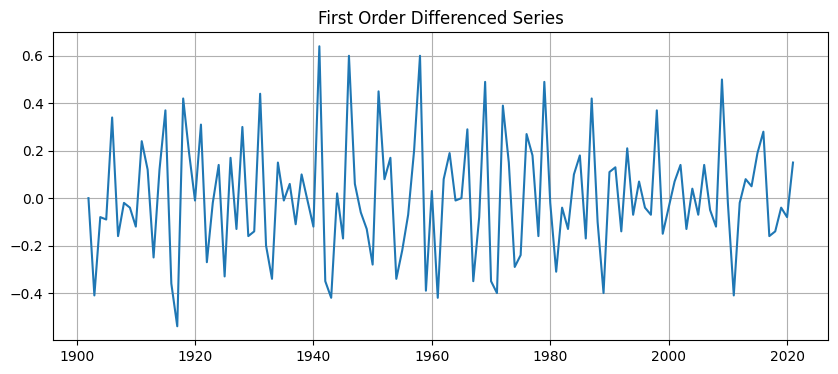

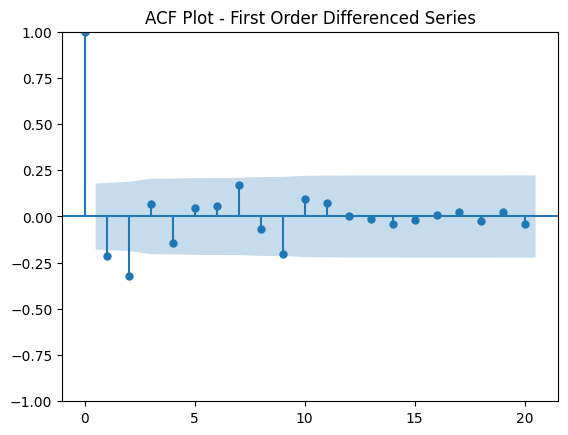

ADF Statistic (After First Differencing): -9.622481518502628
p-value: 1.6944909688647375e-16


In [8]:
# Method of Differencing (First Order Differencing)
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(ts_diff)
plt.title('First Order Differenced Series')
plt.grid()
plt.show()

plot_acf(ts_diff, lags=20)
plt.title('ACF Plot - First Order Differenced Series')
plt.show()

adf_result_diff = adfuller(ts_diff)
print('ADF Statistic (After First Differencing):', adf_result_diff[0])
print('p-value:', adf_result_diff[1])

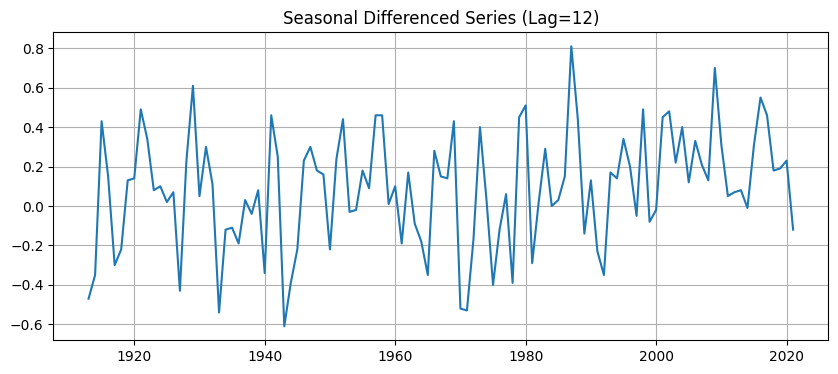

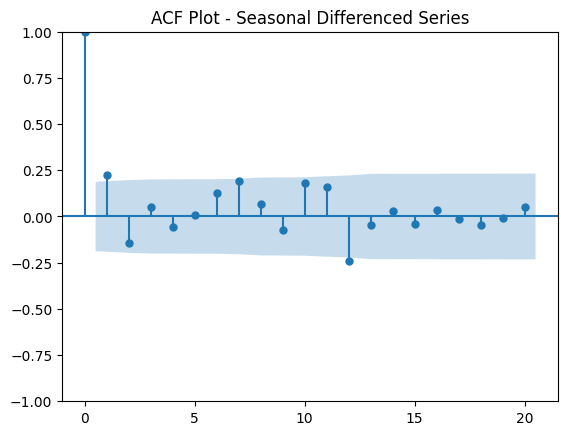

ADF Statistic (After Seasonal Differencing): -1.986173293021386
p-value: 0.29266834086718707


In [9]:
# Method of Seasonal Differencing (Lag=12 for Monthly, adjust if needed)
# For annual data, seasonal differencing may not apply, but demonstrating syntax
ts_seasonal_diff = ts.diff(12).dropna()

plt.figure(figsize=(10, 4))
plt.plot(ts_seasonal_diff)
plt.title('Seasonal Differenced Series (Lag=12)')
plt.grid()
plt.show()

plot_acf(ts_seasonal_diff, lags=20)
plt.title('ACF Plot - Seasonal Differenced Series')
plt.show()

adf_result_seasonal = adfuller(ts_seasonal_diff)
print('ADF Statistic (After Seasonal Differencing):', adf_result_seasonal[0])
print('p-value:', adf_result_seasonal[1])

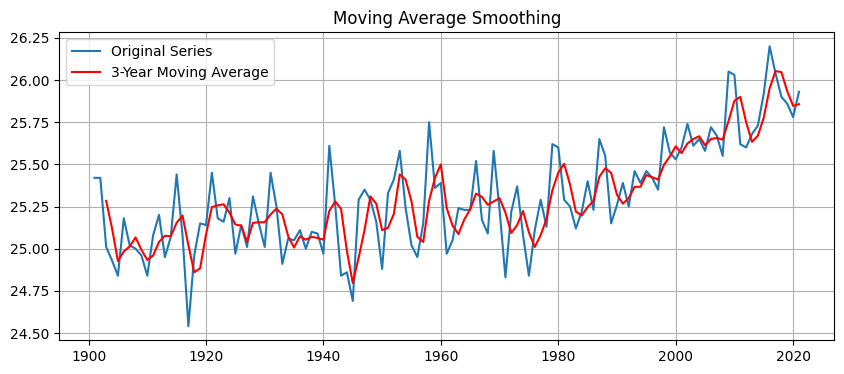

In [10]:
# Moving Average Smoothing (3-Year Rolling Mean)
ts_ma = ts.rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original Series')
plt.plot(ts_ma, color='red', label='3-Year Moving Average')
plt.title('Moving Average Smoothing')
plt.legend()
plt.grid()
plt.show()